# Introduction: Spotify Song Genre Classification

## Problem Description:
This Python notebook presents a comprehensive solution for automating the loan approval process using machine learning techniques. The notebook employs a dataset containing historical loan data to train and evaluate a predictive model, aiming to streamline the decision-making process for loan approval.

# Data description
The data is provided by [Spotify](https://www.kaggle.com/datasets/thedevastator/spotify-tracks-genre-dataset/data)

## Data Exploration & pre-processing: 
The notebook begins with a thorough exploration of the dataset, identifying key features and potential challenges. It covers data cleaning, handling missing values, and encoding categorical variables to prepare the data for model training.



## Baseline columns
| Column Name       | Description                                                                                                      | Data Type  |
|-------------------|------------------------------------------------------------------------------------------------------------------|------------|
| artists           | The name(s) of the artist(s) associated with the track.                                                           | String     |
| album_name        | The name of the album that the track belongs to.                                                                  | String     |
| track_name        | The name of the track.                                                                                            | String     |
| popularity        | The popularity score of the track on Spotify, ranging from 0 to 100.                                              | Integer    |
| duration_ms       | The duration of the track in milliseconds.                                                                       | Integer    |
| explicit          | A boolean value indicating whether the track contains explicit content.                                          | Boolean    |
| danceability      | A score ranging from 0 to 1 that represents how suitable a track is for dancing based on various musical elements. | Float      |
| energy            | A measure of the intensity and activity of a track, ranging from 0 to 1.                                           | Float      |
| key               | The key of the track represented by an integer value.                                                             | Integer    |
| loudness          | The loudness of the track in decibels (dB).                                                                       | Float      |
| mode              | The tonal mode of the track, represented by an integer value (0 for minor, 1 for major).                           | Integer    |
| speechiness       | A score ranging from 0 to 1 that represents the presence of spoken words in a track.                               | Float      |
| acousticness      | A score ranging from 0 to 1 that represents the extent to which a track possesses an acoustic quality.            | Float      |
| instrumentalness  | A score ranging from 0 to 1 that represents the likelihood of a track being instrumental.                         | Float      |
| liveness          | A score ranging from 0 to 1 that represents the presence of an audience during the recording or performance.     | Float      |
| valence           | A score ranging from 0 to 1 that represents the musical positiveness conveyed by a track.                         | Float      |
| tempo             | The tempo of the track in beats per minute (BPM).                                                                 | Float      |
| time_signature    | The number of beats within each bar of the track.                                                                 | Integer    |
| track_genre       | The genre of the track.                                                                                          | String     |


In [841]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import VarianceThreshold


In [922]:
df = pd.read_csv('./data/spotify-data.csv')

# Dropping unnecessary columns
df.drop(['0', 'track_id', 'key'], axis=1, inplace=True)

# There is 1 value that is NA and is just annoying to figure out which row it is. So just drop it.
# TODO: Get back to this.
print("shape", df.shape)
df.dropna(inplace=True)
print("shape", df.shape)

# Preprocessing artists column
df['artists'] = df['artists'].apply(lambda x: x.split(';'))
print(len(df['track_genre'].unique()))
df.isna().sum()
genres = ['pop', 'salsa', 'club', 'disco', 'children', 'funk', 'rock', 'soul', 'turkish', 'sleep']
df = df[df.track_genre.isin(genres)]
print(df['track_genre'].unique())

shape (114000, 18)
shape (113999, 18)
114
['children' 'club' 'disco' 'funk' 'pop' 'rock' 'salsa' 'sleep' 'soul'
 'turkish']


## Exploratory Data Analysis (EDA): 
Here we will provide insights into the distribution of key variables, relationships between features, and an understanding of the data patterns. Visualizations aid in uncovering trends that contribute to the decision-making process.

Feature Engineering: The notebook implements feature engineering techniques to enhance the predictive power of the model. This involves creating new features, transforming existing ones, and selecting relevant variables to improve the model's ability to capture underlying patterns.

Model Selection: Multiple machine learning algorithms are explored for Spotify Genre prediction, including but not limited to ?? 
logistic regression, decision trees, random forests, and support vector machines. The notebook includes a comparative analysis of their performance metrics, helping users choose the most suitable model for their specific use case.

Model Training and Evaluation: The selected model is trained on the preprocessed dataset, and its performance is evaluated using various metrics such as accuracy, precision, recall, and F1 score. The notebook emphasizes the importance of choosing an evaluation metric that aligns with the business goals of the loan approval system.

Hyperparameter Tuning: To optimize the model's performance, the notebook incorporates hyperparameter tuning techniques, fine-tuning the model for better accuracy and robustness.

Deployment Considerations: The notebook concludes with a discussion on deploying the trained model into a production environment. It provides insights into model deployment options, considerations for scalability, and integration with existing loan approval systems.

By leveraging this Python notebook, users can seamlessly integrate an automated loan approval prediction model into their financial systems, significantly enhancing efficiency and reducing the time and resources required for manual decision-making.


In [923]:
numerical_columns = df.select_dtypes(include=np.number).columns.tolist()
categorical_columns = ['track_genre', 'explicit', 'mode']
# for col in numerical_columns:
#     column_data = df[col]
#     _, ax = plt.subplots()
#     ax.set_title(f'Histogram of {col}')
    
#     plt.hist(column_data)
#     plt.show()
#     print(column_data.describe())

In [924]:
# for col in categorical_columns:
#     column_data = df[col]
#     fig, ax = plt.subplots()
#     ax.set_title(f'Bar plot of {col}')
#     ax.pie(column_data.value_counts(), labels=column_data.value_counts().index, autopct='%1.1f%%')
#     plt.show()

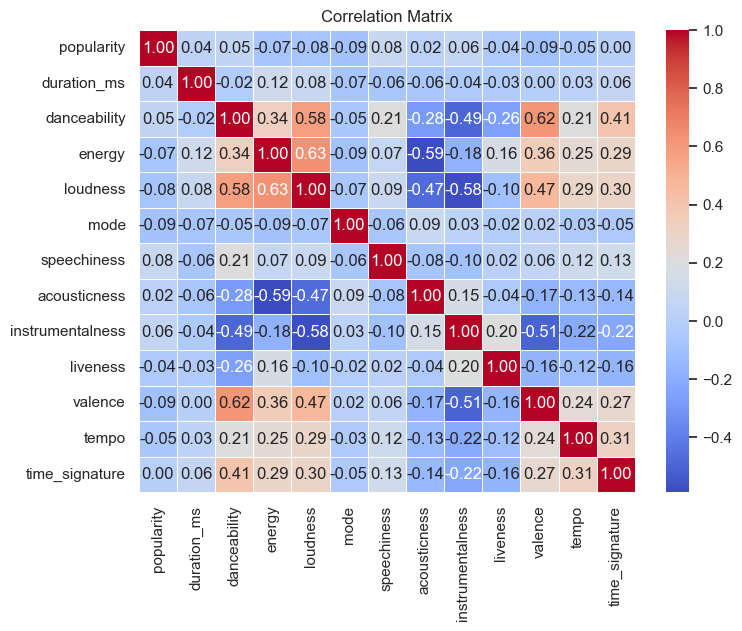

In [925]:
correlation_matrix = df[numerical_columns].corr()

# Use seaborn for a more visually appealing heatmap
sns.set(style="white")

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title("Correlation Matrix")
plt.show()

## Feature selection & engineering
1) Drop columns with high correlation
2) Drop low variance columns
3) One-hot encoding the categorical columns

In [926]:
# 1) There are not variables with high correlation in the dataset to be dropped
# Maybe energy and accousticness, but I'll leave them for now.

# 2) Dropping constant values and features with low variance
selector = VarianceThreshold(0.015)
print(df[numerical_columns].var())
selector.fit(df[numerical_columns])
dropped_columns = []
for index, col in enumerate(numerical_columns):
    if(not selector.get_support()[index]):
        dropped_columns.append(col)
        numerical_columns.remove(col)

print("Columns to be dropped:", dropped_columns)
df.drop(dropped_columns, axis=1, inplace=True)

popularity          6.154242e+02
duration_ms         1.119863e+10
danceability        4.174579e-02
energy              5.983537e-02
loudness            4.175868e+01
mode                2.332790e-01
speechiness         8.533218e-03
acousticness        9.623085e-02
instrumentalness    8.782671e-02
liveness            3.307482e-02
valence             8.554069e-02
tempo               1.068972e+03
time_signature      4.137374e-01
dtype: float64
Columns to be dropped: ['speechiness']


In [927]:
# 3) One hot encoding before splitting the data to avoid getting 
# different number of columns in train and test data
dummy_data = pd.get_dummies(df, columns=['track_genre'], prefix=['track_genre'])
df = pd.concat([df, dummy_data], axis=1)
# Add the dummy columns to the list of numerical columns
new_columns = dummy_data.columns.difference(df.columns).tolist()
numerical_columns.extend(new_columns)

# Base model: Decision tree
We are going to start with DecisionTreeClassifier as a base model. We will try to compare it the performance of it with other models

- [ ] Try post-pruning the tree

In [963]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import metrics

# Split dataset into training set and test set
train_data, test_data, train_label, test_label = train_test_split(df[numerical_columns], df['track_genre'], test_size=0.33)
# Run a for loop over range(2,50) for finding the best split and leaf hyperparameter values.
decision_tree_clf = DecisionTreeClassifier(min_samples_split=25, min_samples_leaf=10) 

# Single split, no cross validation
# decision_tree_clf.fit(train_data, train_label)
# y_pred = decision_tree_clf.predict(test_data)
# print("F1 score", metrics.f1_score(test_label, y_pred, average='weighted'))

# Cross validation
scores = cross_val_score(decision_tree_clf, df[numerical_columns], df['track_genre'], cv=10, scoring='f1_weighted')
print(scores)
print(scores.mean())
print(decision_tree_clf.tree_.node_count) # ~1k 

[0.3551297  0.44088765 0.52388415 0.56404217 0.57686046 0.62079028
 0.65301161 0.62529803 0.59068376 0.55490425]
0.5505492047430447


# A more advanced more: Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Also let's do cross validation
random_forest_clf = RandomForestClassifier(min_samples_split=25, min_samples_leaf=10)
scores = cross_val_score(random_forest_clf, df[numerical_columns], df['track_genre'], cv=10, scoring='f1_weighted')
print(scores)
print(scores.mean())

F1 score 0.680741273295529
F1 score 0.700550203104397
F1 score 0.6963713699386008
F1 score 0.6994560465784737
F1 score 0.7014719383375604
F1 score 0.7013617501574787
F1 score 0.7058674171429626
F1 score 0.7007261508478397
F1 score 0.6992912323928455
F1 score 0.7040389584833999
F1 score 0.7019045850058852
F1 score 0.7067431952435433
F1 score 0.7065738919601084
F1 score 0.7018834344270133
F1 score 0.7045045107566025
F1 score 0.7041399514996293
F1 score 0.7020077997670534
F1 score 0.7088309236142435


In [ ]:
# Create a 3D scatter plot
print(x[96], y[96])
for i in range(0, len(x)):
    print(x[i], y[i], z[i])
    
fig, ax = plt.sub_plots(111, projection='3d')
ax.scatter(x, y, z, c='blue', marker='o', label='Data Points')

# Set labels for each axis
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Z-axis')

# Set a title for the plot
ax.set_title('3D Scatter Plot')

# Display the legend
ax.legend()

# Show the plot
plt.show()

4 2
2 2 0.7333333333333333
2 3 0.7306060606060606
2 4 0.73
2 5 0.7263636363636363
2 6 0.7224242424242424
2 7 0.7190909090909091
2 8 0.72
2 9 0.7215151515151516
2 10 0.7112121212121212
2 11 0.7127272727272728
2 12 0.7121212121212122
2 13 0.7142424242424242
2 14 0.7072727272727273
2 15 0.7054545454545454
2 16 0.7015151515151515
2 17 0.7015151515151515
2 18 0.7
2 19 0.7012121212121212
2 20 0.7003030303030303
2 21 0.696969696969697
2 22 0.6987878787878787
2 23 0.693939393939394
2 24 0.6945454545454546
2 25 0.6933333333333334
2 26 0.693939393939394
2 27 0.6918181818181818
2 28 0.6887878787878788
2 29 0.6878787878787879
2 30 0.6951515151515152
2 31 0.6854545454545454
2 32 0.6857575757575758
2 33 0.6818181818181818
2 34 0.6815151515151515
2 35 0.6806060606060607
2 36 0.6812121212121212
2 37 0.6809090909090909
2 38 0.6742424242424242
2 39 0.6815151515151515
2 40 0.6727272727272727
2 41 0.6809090909090909
2 42 0.6684848484848485
2 43 0.6772727272727272
2 44 0.6748484848484848
2 45 0.67212121212

AttributeError: module 'matplotlib.pyplot' has no attribute 'sub_plots'